<a href="https://www.kaggle.com/code/rohankasodariya/cardiovascular-diseases-risk-prediction-dataset?scriptVersionId=172550016" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv


In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder,LabelEncoder, MinMaxScaler
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

In [3]:
df = pd.read_csv('/kaggle/input/cardiovascular-diseases-risk-prediction-dataset/CVD_cleaned.csv')
df.head()

,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
df.rename(columns = {'Height_(cm)':'Height','Weight_(kg)':'Weight'}, inplace =True)

In [5]:
df.isnull().mean()*100

General_Health                  0.0
Checkup                         0.0
Exercise                        0.0
Heart_Disease                   0.0
Skin_Cancer                     0.0
Other_Cancer                    0.0
Depression                      0.0
Diabetes                        0.0
Arthritis                       0.0
Sex                             0.0
Age_Category                    0.0
Height                          0.0
Weight                          0.0
BMI                             0.0
Smoking_History                 0.0
Alcohol_Consumption             0.0
Fruit_Consumption               0.0
Green_Vegetables_Consumption    0.0
FriedPotato_Consumption         0.0
dtype: float64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 308854 entries, 0 to 308853
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   General_Health                308854 non-null  object 
 1   Checkup                       308854 non-null  object 
 2   Exercise                      308854 non-null  object 
 3   Heart_Disease                 308854 non-null  object 
 4   Skin_Cancer                   308854 non-null  object 
 5   Other_Cancer                  308854 non-null  object 
 6   Depression                    308854 non-null  object 
 7   Diabetes                      308854 non-null  object 
 8   Arthritis                     308854 non-null  object 
 9   Sex                           308854 non-null  object 
 10  Age_Category                  308854 non-null  object 
 11  Height                        308854 non-null  float64
 12  Weight                        308854 non-nul

# EDA

<Axes: title={'center': 'General Health'}, xlabel='General_Health'>

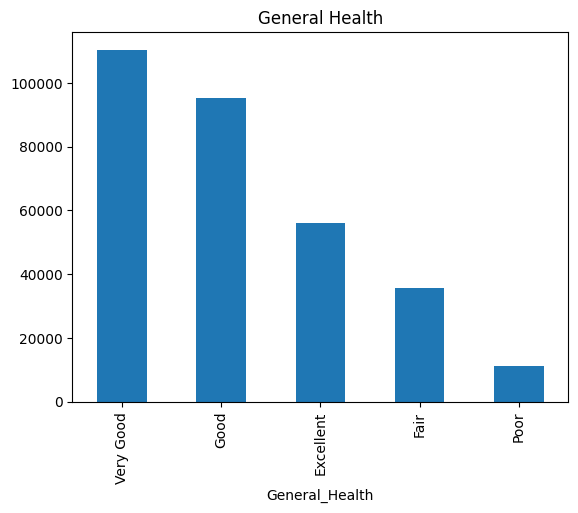

In [7]:
plt.title('General Health')
df.General_Health.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Checkup'}, xlabel='Checkup'>

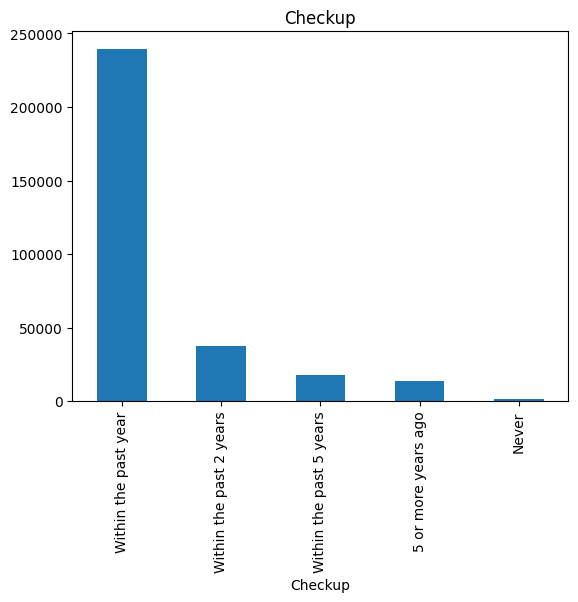

In [8]:
plt.title('Checkup')
df.Checkup.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Exercise'}, xlabel='Exercise'>

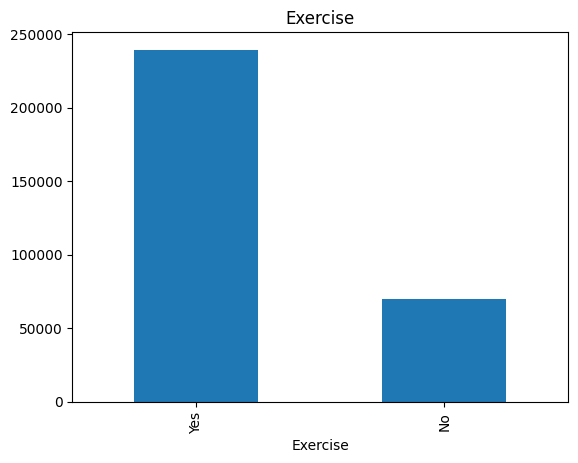

In [9]:
plt.title('Exercise')
df.Exercise.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Heart Disease'}, xlabel='Heart_Disease'>

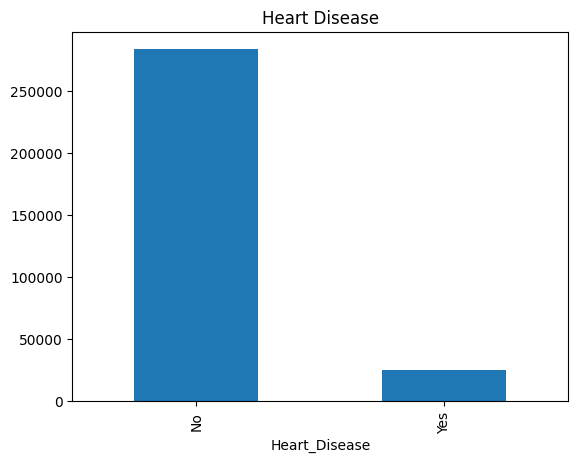

In [10]:
plt.title('Heart Disease')
df.Heart_Disease.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Skin Cancer'}, xlabel='Skin_Cancer'>

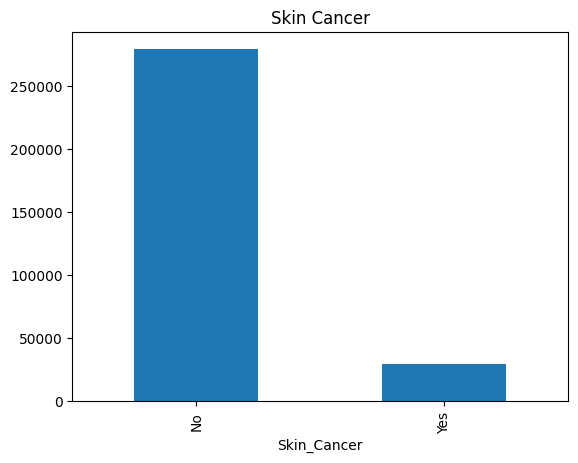

In [11]:
plt.title('Skin Cancer')
df.Skin_Cancer.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Depression'}, xlabel='Depression'>

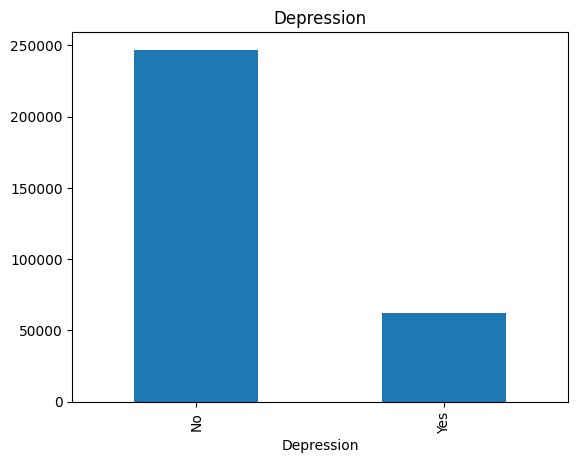

In [12]:
plt.title('Depression')
df.Depression.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Diabetes'}, xlabel='Diabetes'>

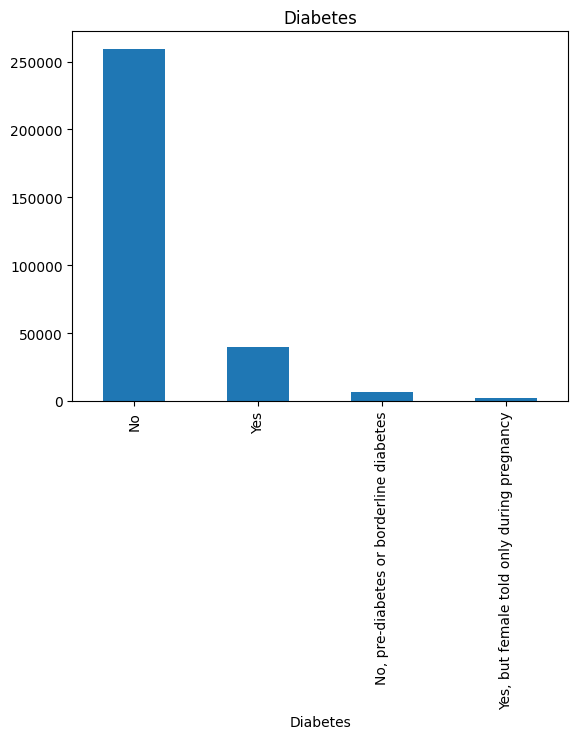

In [13]:
plt.title('Diabetes')
df.Diabetes.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Arthritis'}, xlabel='Arthritis'>

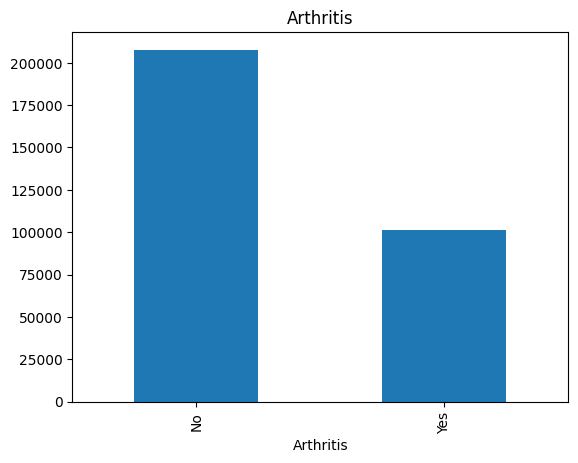

In [14]:
plt.title('Arthritis')
df.Arthritis.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Sex'}, xlabel='Sex'>

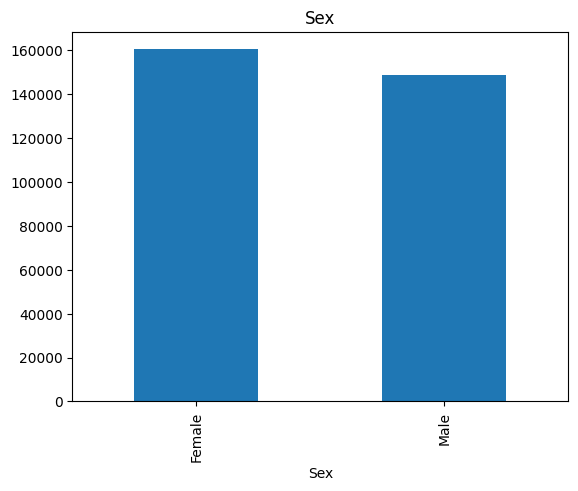

In [15]:
plt.title('Sex')
df.Sex.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Age_Category'}, xlabel='Age_Category'>

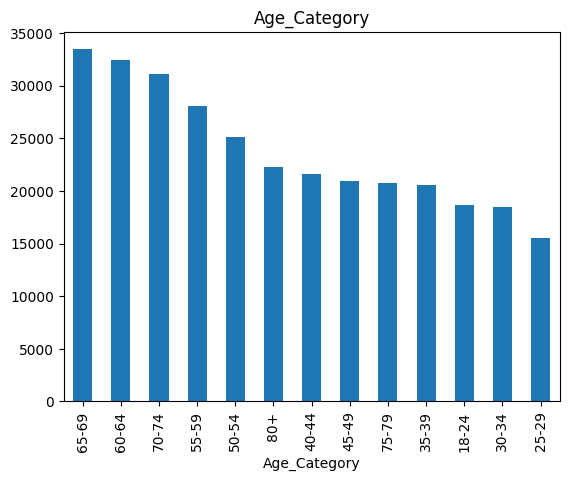

In [16]:
plt.title('Age_Category')
df.Age_Category.value_counts().plot(kind = 'bar')

<Axes: title={'center': 'Smoking History'}, xlabel='Smoking_History'>

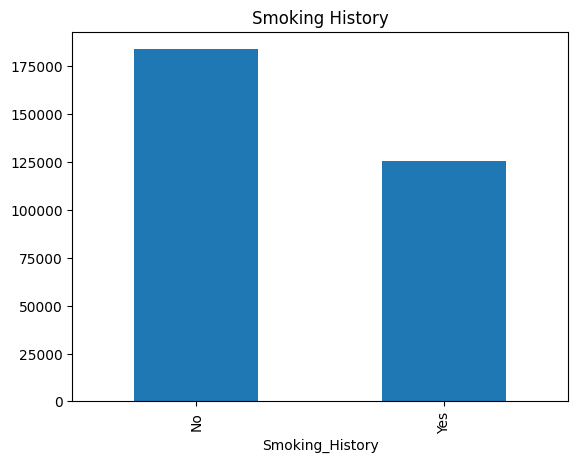

In [17]:
plt.title('Smoking History')
df.Smoking_History.value_counts().plot(kind = 'bar')

# Bivariate Analysis

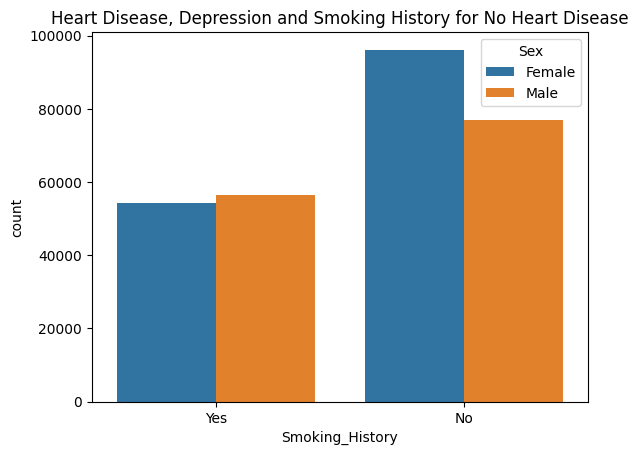

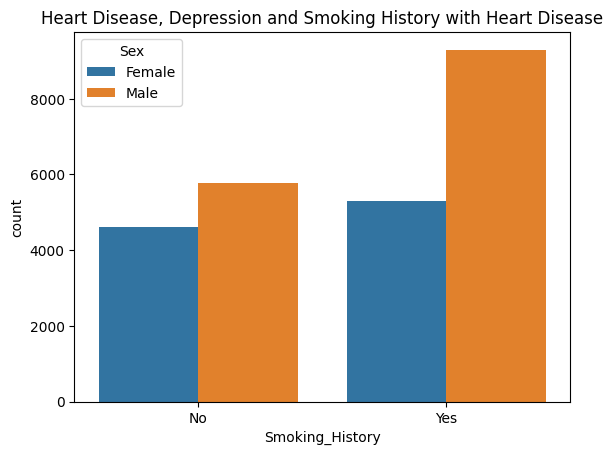

In [18]:
for i in df.Heart_Disease.unique():
    if i== 'No':
        sns.countplot(df[df.Heart_Disease==i], x = 'Smoking_History',hue = 'Sex').set(title = 'Heart Disease, Depression and Smoking History for No Heart Disease')
        plt.show()
    else:
        sns.countplot(df[df.Heart_Disease==i], x = 'Smoking_History',hue = 'Sex').set(title = 'Heart Disease, Depression and Smoking History with Heart Disease')
        plt.show()
        

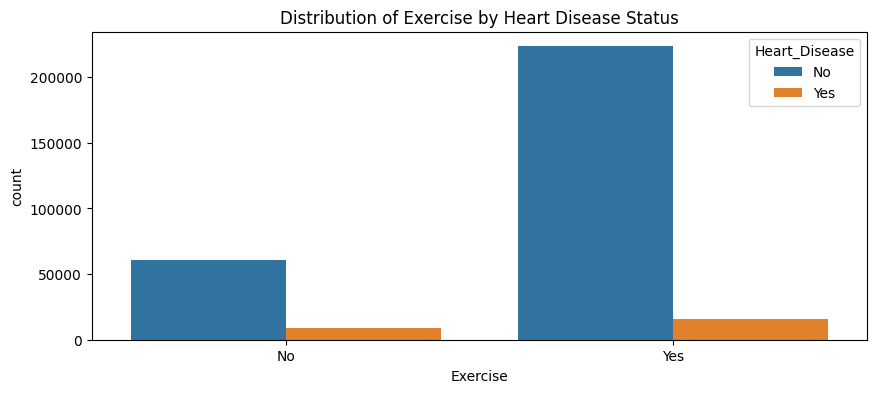

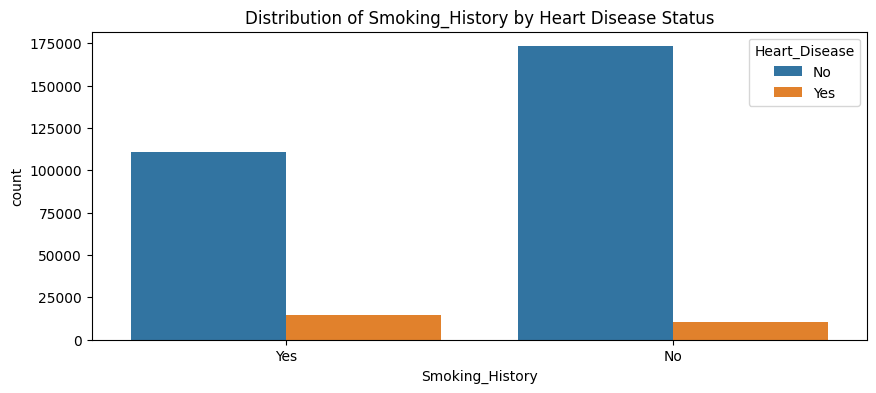

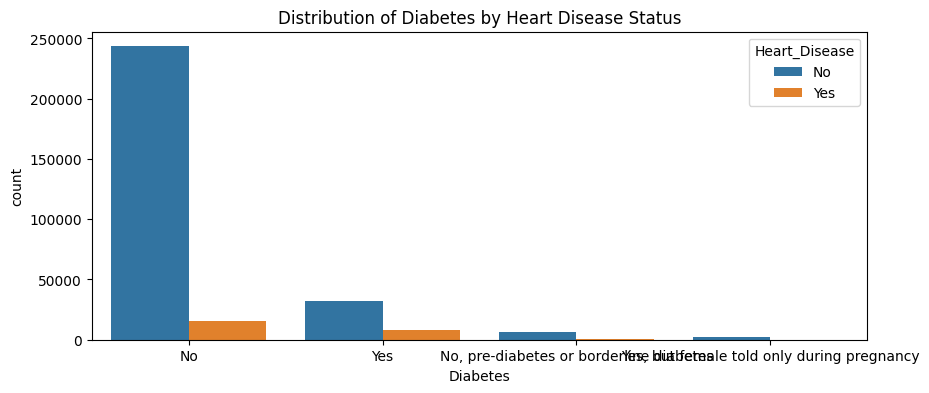

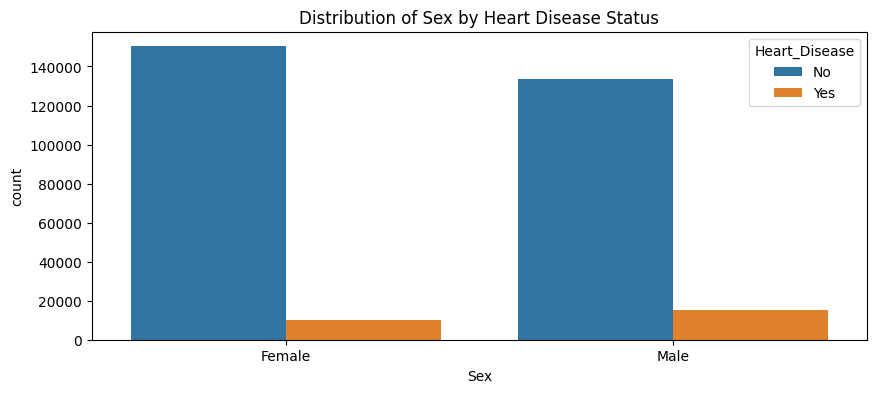

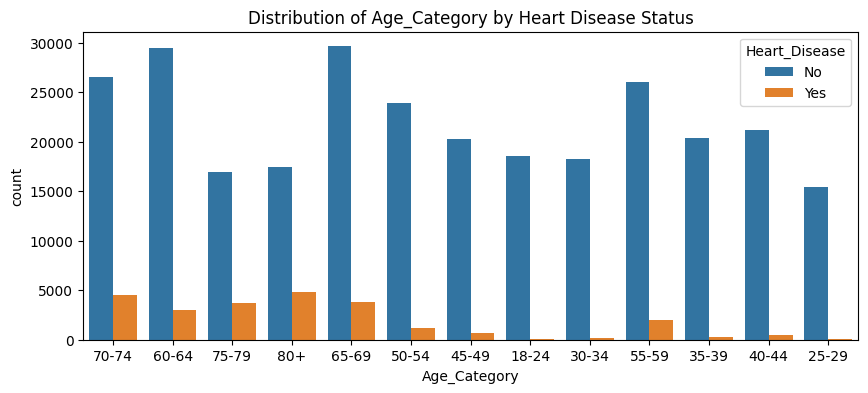

In [19]:
# Count plots for categorical variables with respect to Heart Disease
categorical_vars = ['Exercise', 'Smoking_History', 'Diabetes', 'Sex','Age_Category']
for var in categorical_vars:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=var, hue='Heart_Disease', data=df)
    plt.title(f'Distribution of {var} by Heart Disease Status')
    plt.show()

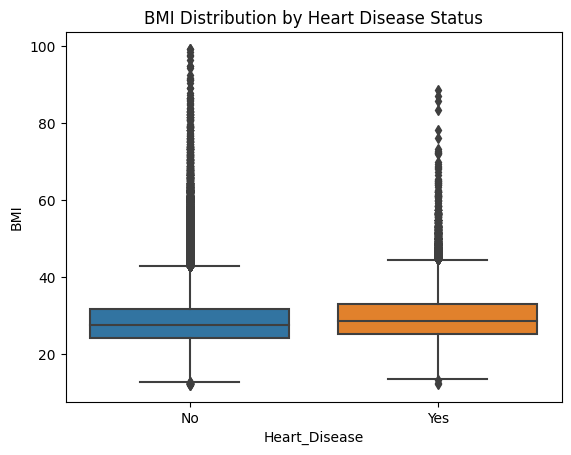

In [20]:
# Box plots for BMI distributed by Heart Disease status
sns.boxplot(x='Heart_Disease', y='BMI', data=df)
plt.title('BMI Distribution by Heart Disease Status')
plt.show()

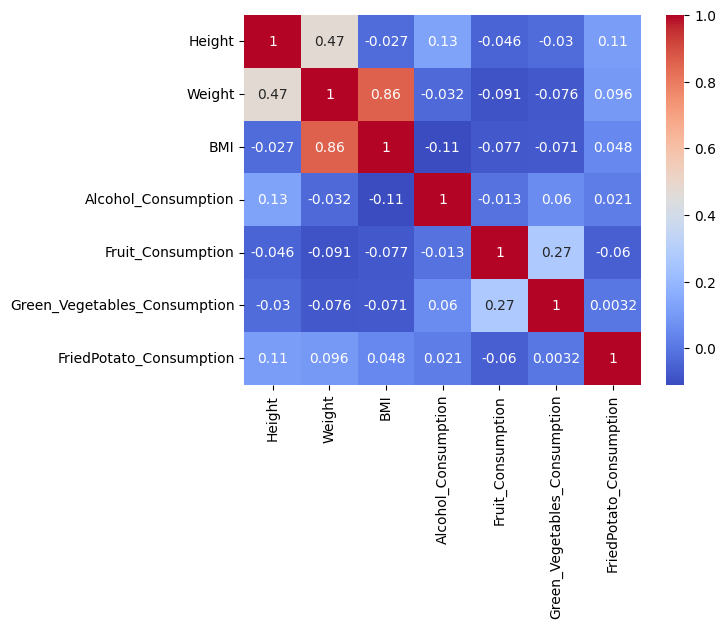

In [21]:
# Correlation matrix among numerical variables
correlation_matrix = df[['Height','Weight','BMI', 'Alcohol_Consumption', 'Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [22]:
# Handling Age_Category

def calculate_midpoint(age_range):
    if '+' in age_range:
        return 85
    else:
        lower, upper = map(int,age_range.split('-'))
        return (lower + upper)/ 2
    
# Applying the midpoint calculation

df['Age_Category'] = df['Age_Category'].apply(calculate_midpoint)

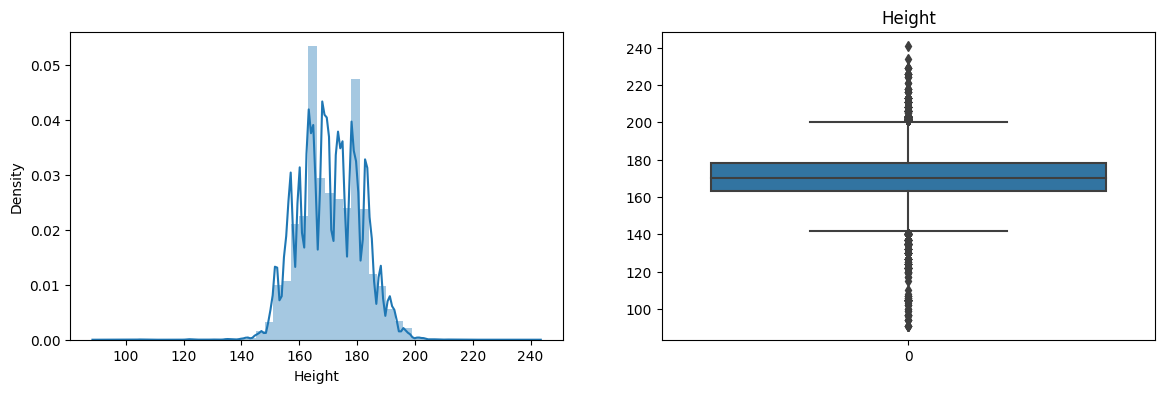

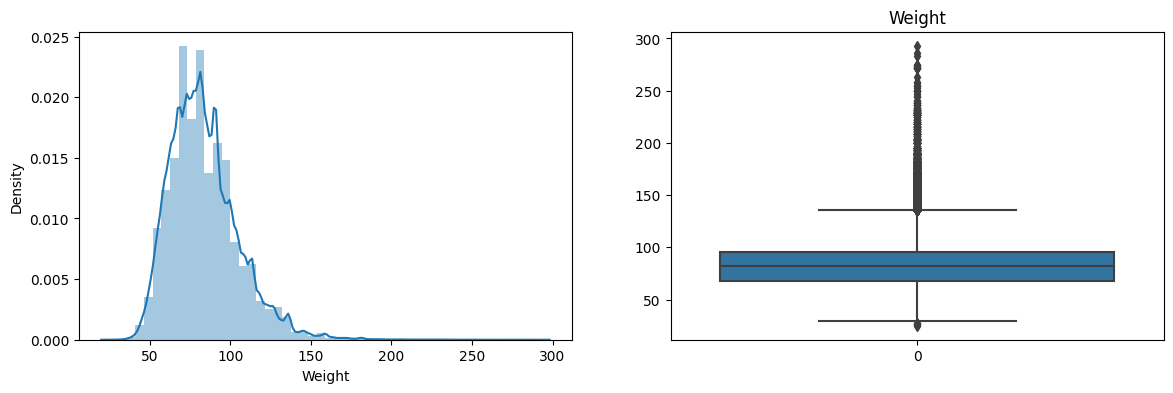

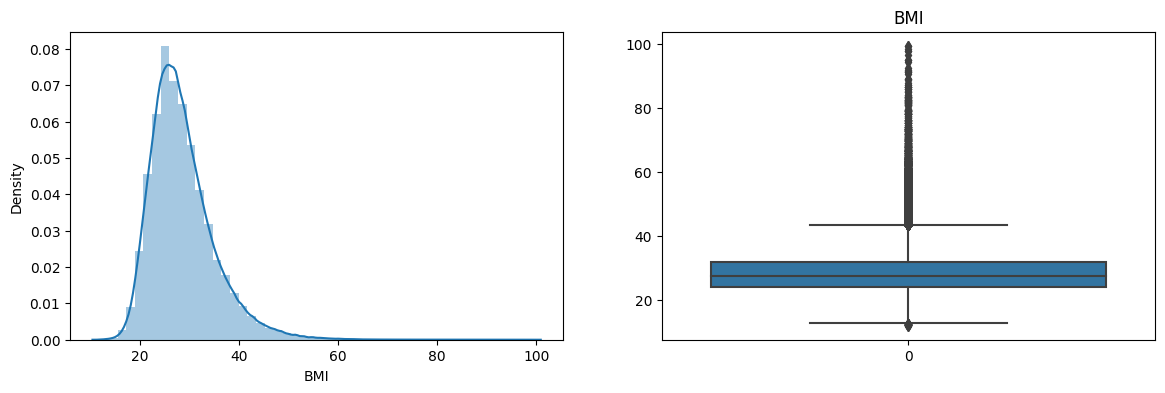

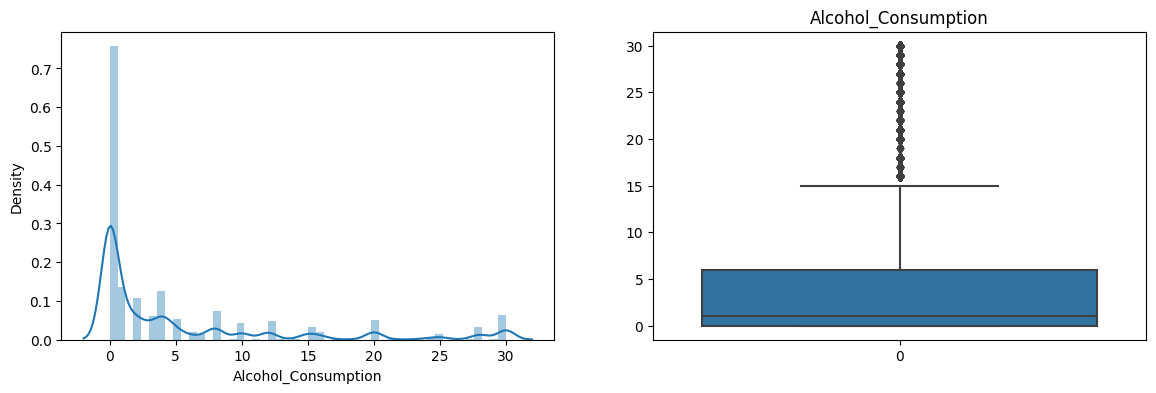

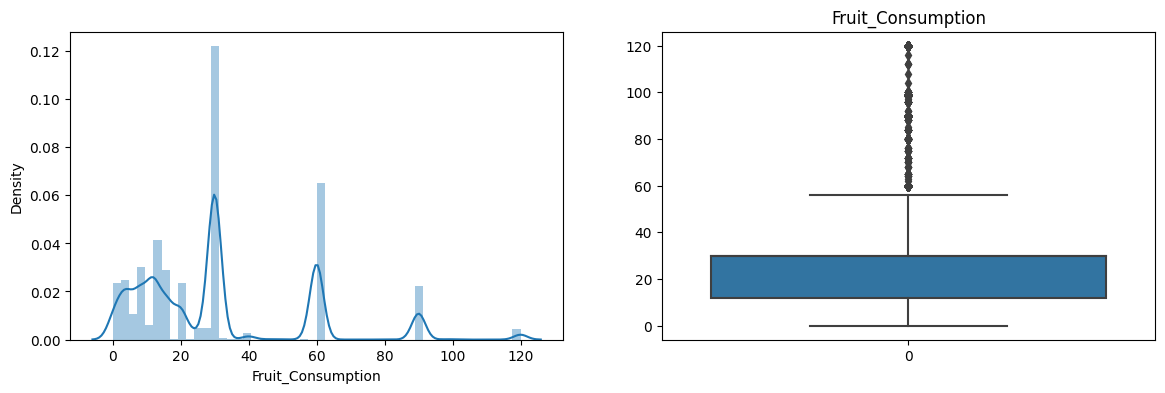

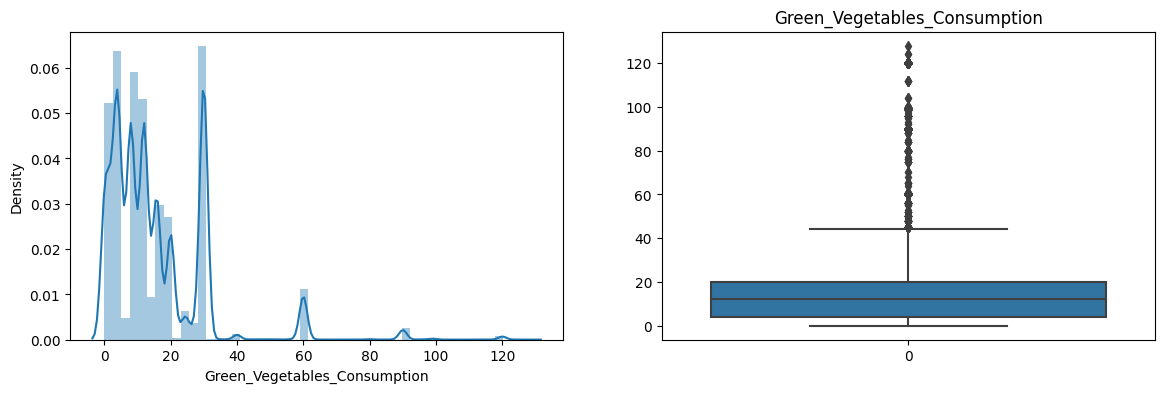

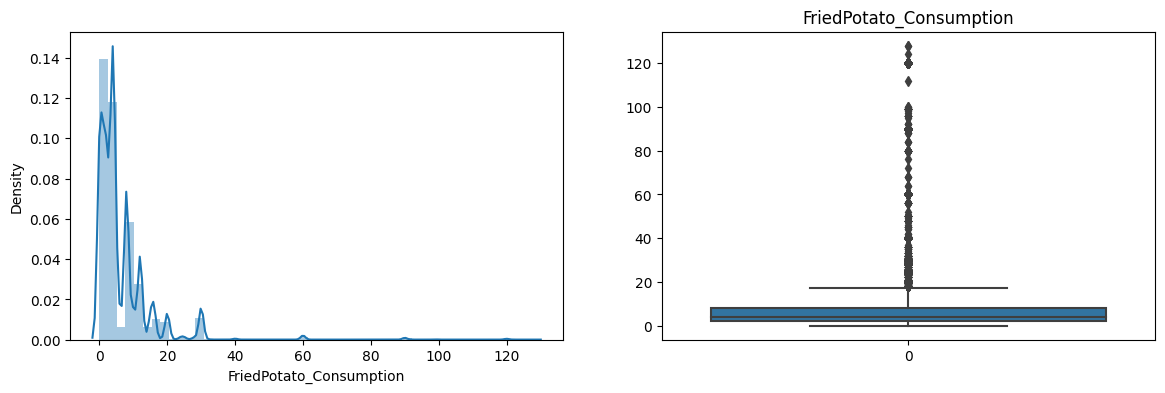

In [23]:
# Checking the skewness of numeric data
numeric = ['Height','Weight','BMI','Alcohol_Consumption','Fruit_Consumption','Green_Vegetables_Consumption','FriedPotato_Consumption']

for col in numeric:
    plt.figure(figsize = (14,4))
    plt.title(f'{col}')
    plt.subplot(1,2,1)
    sns.distplot(df[col])

    plt.subplot(1,2,2)
    sns.boxplot(df[col])
    plt.title(f'{col}')

In [24]:
# Handling the outliers

for col in numeric:
    percentile25 = df[col].quantile(0.25)
    percentile75 = df[col].quantile(0.75)
    IQR = percentile75 - percentile25
    
    upper_limit = percentile75 + 1.5 * IQR
    lower_limit = percentile25 - 1.5 * IQR
    
    df[col] = np.where(df[col] > upper_limit, upper_limit,
                      np.where(df[col] < lower_limit, lower_limit, df[col]))
    
    

In [25]:
X = df.drop(columns = ['Heart_Disease'])
y = df['Heart_Disease']

label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

X_train,X_test, y_train, y_test = train_test_split(X,y_encoded,test_size = 0.2, random_state =42)

In [26]:
from collections import Counter
counter = Counter(y_train)
print('Before',counter)

Before Counter({0: 227109, 1: 19974})


In [27]:
# Using columntransformer to encode categorical data
trf = ColumnTransformer(transformers = [
    ('tnf1',OrdinalEncoder(categories = [['Poor','Fair','Good','Very Good','Excellent']]),['General_Health']),
    ('tnf2',OneHotEncoder(),['Checkup','Exercise','Skin_Cancer','Other_Cancer','Depression','Diabetes','Arthritis','Sex','Smoking_History'])
], remainder= 'passthrough')

In [28]:
pipe = Pipeline([
    ('trf1',trf)
])

In [29]:
X_train_transformed = pipe.fit_transform(X_train)
X_test_transformed = pipe.transform(X_test)

In [30]:
# As the dataset is imbalance using SMOTE to make it balance
smote = SMOTE(random_state =42)

In [31]:
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_transformed,y_train)

In [32]:
print('Before SMOTE:',Counter(y_train))
print('After SMOTE:', Counter(y_train_resampled))

Before SMOTE: Counter({0: 227109, 1: 19974})
After SMOTE: Counter({0: 227109, 1: 227109})


# Logistic Regression Model

In [33]:
model = LogisticRegression()

In [34]:
model.fit(X_train_resampled,y_train_resampled)

LogisticRegression()

In [35]:
y_pred = model.predict(X_test_transformed)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      0.74      0.84     56774
           1       0.21      0.78      0.33      4997

    accuracy                           0.75     61771
   macro avg       0.59      0.76      0.59     61771
weighted avg       0.91      0.75      0.80     61771

